In [1]:
import sys
sys.path.append(r'D:\github\ripple_heterogeneity\python')
import functions,loading,replay_run

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import importlib
import glob
import os
import pickle

C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\plotting\decoding.py:9: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.


In [2]:
functions.set_plotting_defaults()
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

fig_save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\figures\panels'

In [3]:
save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\replay_test'

sessions = glob.glob(save_path +os.sep+ '*.pkl')
df = pd.DataFrame()
for session in sessions:
    with open(session, 'rb') as f:
        results = pickle.load(f)

    for key_ in results.keys():

        # calc and add ripple participation
        st = results[key_]['sta_placecells']
        bst = results[key_]['bst_placecells']
        if len(bst.support.starts) == 0:
            results[key_]['df']['pop_partic'] = 0
        else:
            particip_mat = functions.get_participation(st.data,bst.support.starts,bst.support.stops)
            results[key_]['df']['pop_partic'] = particip_mat.mean(axis=0)
        
        # add behavioral decoding quality
        results[key_]['df']['decoding_r2'] = np.float(results[key_]['decoding_r2'])
        results[key_]['df']['decoding_r2_pval'] = np.float(results[key_]['decoding_r2_pval'])
        results[key_]['df']['decoding_median_error'] = np.float(results[key_]['decoding_median_error'])
        results[key_]['df']['total_units'] = np.float(results[key_]['total_units'])
        results[key_]['df']['direction'] = key_
        
        # add epoch
        if len(results[key_]['df']) > 0:
            epoch_df = loading.load_epoch(results[key_]['session'])
            results[key_]['df'].loc[results[key_]['df'].start.between(epoch_df.startTime[0],epoch_df.stopTime[0]),'epoch'] = 'pre_sleep'
            results[key_]['df'].loc[results[key_]['df'].start.between(epoch_df.startTime[1],epoch_df.stopTime[1]),'epoch'] = 'linear'
            results[key_]['df'].loc[results[key_]['df'].start.between(epoch_df.startTime[2],epoch_df.stopTime[2]),'epoch'] = 'post_sleep'

        df = df.append(results[key_]['df'],ignore_index=True)
df

C:\Users\Cornell\AppData\Local\Temp/ipykernel_10628/201020602.py:21: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
C:\Users\Cornell\AppData\Local\Temp/ipykernel_10628/201020602.py:22: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
C:\Users\Cornell\AppData\Local\Temp/ipykernel_10628/201020602.py:23: DeprecationWarning: `np.float` is a deprecate

,start,stop,peaks,amplitude,duration,frequency,detectorName,ripple_channel,event_spk_thres,basepath,...,traj_speed,traj_step,replay_type,pop_partic,decoding_r2,decoding_r2_pval,decoding_median_error,total_units,direction,epoch
0,3019.3968,3019.4952,3019.4384,785.686290,0.0984,159.392451,bz_DetectSWR,45,0,Z:\Data\GrosmarkAD\Buddy\Buddy_06272013,...,2.371968e+02,7.115903e+00,reverse,0.833333,NaN,1.0,18.224356,6.0,outbound_epochs,pre_sleep
1,11477.0392,11477.1688,11477.1048,423.677463,0.1296,158.050985,bz_DetectSWR,45,0,Z:\Data\GrosmarkAD\Buddy\Buddy_06272013,...,1.367116e+03,3.645642e+01,forward,0.833333,NaN,1.0,18.224356,6.0,outbound_epochs,linear
2,12217.2960,12217.4216,12217.3416,166.371363,0.1256,184.602936,bz_DetectSWR,45,0,Z:\Data\GrosmarkAD\Buddy\Buddy_06272013,...,7.504043e+02,2.001078e+01,reverse,0.833333,NaN,1.0,18.224356,6.0,outbound_epochs,linear
3,12348.1768,12348.2792,12348.2456,403.125513,0.1024,142.182883,bz_DetectSWR,45,0,Z:\Data\GrosmarkAD\Buddy\Buddy_06272013,...,7.547170e+01,1.509434e+00,forward,0.833333,NaN,1.0,18.224356,6.0,outbound_epochs,linear
4,13076.5688,13076.6784,13076.6128,315.015613,0.1096,173.667261,bz_DetectSWR,45,0,Z:\Data\GrosmarkAD\Buddy\Buddy_06272013,...,8.582210e+02,2.288589e+01,forward,0.833333,NaN,1.0,18.224356,6.0,outbound_epochs,post_sleep
5,14244.3832,14244.4920,14244.4280,295.255882,0.1088,189.311449,bz_DetectSWR,45,0,Z:\Data\GrosmarkAD\Buddy\Buddy_06272013,...,0.000000e+00,0.000000e+00,reverse,1.000000,NaN,1.0,18.224356,6.0,outbound_epochs,post_sleep
6,16614.4688,16614.5720,16614.4872,473.315285,0.1032,162.074561,bz_DetectSWR,45,0,Z:\Data\GrosmarkAD\Buddy\Buddy_06272013,...,5.929919e+02,1.778976e+01,forward,0.833333,NaN,1.0,18.224356,6.0,outbound_epochs,post_sleep
7,16816.6792,16816.7872,16816.7240,216.290978,0.1080,153.370558,bz_DetectSWR,45,0,Z:\Data\GrosmarkAD\Buddy\Buddy_06272013,...,6.792453e+02,1.811321e+01,reverse,0.833333,NaN,1.0,18.224356,6.0,outbound_epochs,post_sleep
8,18846.5128,18846.6344,18846.6264,545.352911,0.1216,143.300980,bz_DetectSWR,45,0,Z:\Data\GrosmarkAD\Buddy\Buddy_06272013,...,2.086570e+02,6.955235e+00,reverse,0.833333,NaN,1.0,18.224356,6.0,outbound_epochs,post_sleep
9,18846.5128,18846.6344,18846.6264,545.352911,0.1216,143.300980,bz_DetectSWR,45,0,Z:\Data\GrosmarkAD\Buddy\Buddy_06272013,...,2.086570e+02,6.955235e+00,reverse,0.833333,NaN,1.0,18.224356,6.0,outbound_epochs,post_sleep


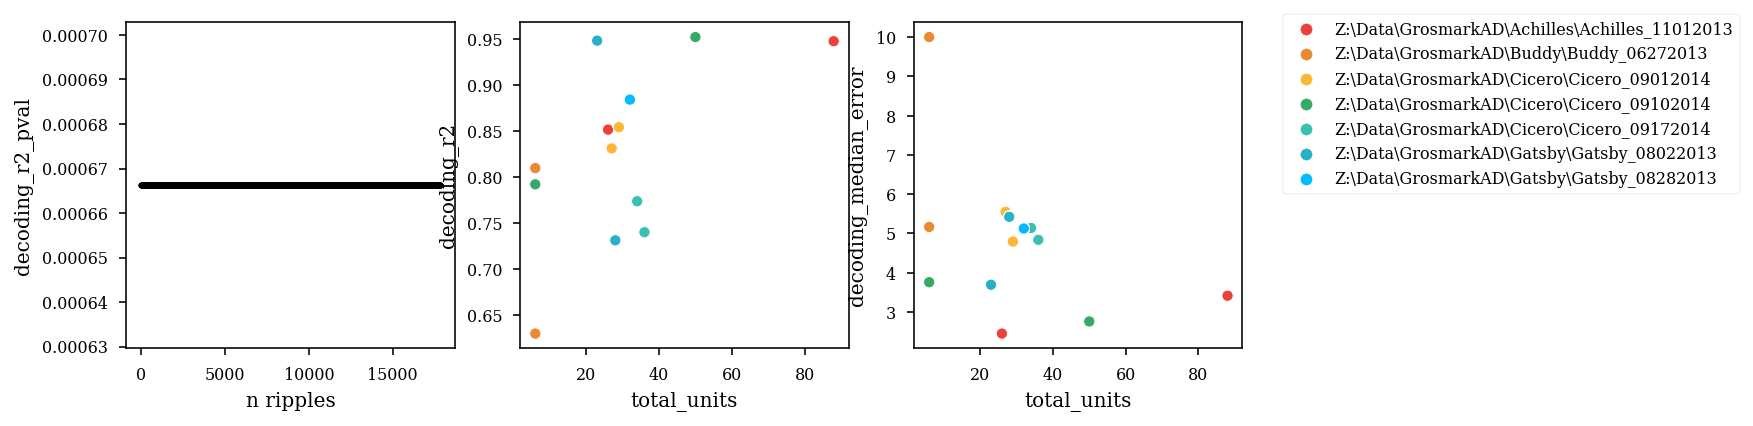

In [102]:
import seaborn as sns
fig,axs = plt.subplots(1,3,figsize=(10,3))
axs[0].plot(df.decoding_r2_pval,'.k')
axs[0].set_ylabel('decoding_r2_pval')
axs[0].set_xlabel('n ripples')

sns.scatterplot(x="total_units", y="decoding_r2",
                hue="basepath",
                data=df, ax=axs[1],legend=False)

sns.scatterplot(x="total_units", y="decoding_median_error",
                hue="basepath",
                data=df, ax=axs[2])
axs[2].legend(bbox_to_anchor=(1.1, 1.05))

In [4]:
for basepath in df.basepath.unique():
    print(np.where(np.diff(df[(df.score_pval_col_cycle < 0.05) & (df.basepath == basepath)].start.values) == 0))

(array([1], dtype=int64),)


In [5]:
# basepath = df.basepath.unique()[0]
# for basepath in df.basepath.unique():
#     df[df.basepath == basepath] = df[np.argsort(df[df.basepath == basepath].start)]

df = df.sort_values(by=['basepath','start'])
df
# df[(df['score_pval_col_cycle'] < 0.05) & (df.basepath == basepath)]
# df[(df['score_pval_col_cycle'] < 0.05) & (df.basepath == basepath) & (df.replay_type == 'forward')]
# df[(df['score_pval_col_cycle'] < 0.05) & (df.basepath == basepath) & (df.replay_type == 'reverse')]
# df.

,start,stop,peaks,amplitude,duration,frequency,detectorName,ripple_channel,event_spk_thres,basepath,...,traj_speed,traj_step,replay_type,pop_partic,decoding_r2,decoding_r2_pval,decoding_median_error,total_units,direction,epoch
0,3019.3968,3019.4952,3019.4384,785.686290,0.0984,159.392451,bz_DetectSWR,45,0,Z:\Data\GrosmarkAD\Buddy\Buddy_06272013,...,2.371968e+02,7.115903e+00,reverse,0.833333,NaN,1.0,18.224356,6.0,outbound_epochs,pre_sleep
12,9460.0720,9460.1528,9460.0896,850.696401,0.0808,141.519957,bz_DetectSWR,45,0,Z:\Data\GrosmarkAD\Buddy\Buddy_06272013,...,1.267925e+03,2.535849e+01,reverse,0.833333,NaN,1.0,20.512832,6.0,inbound_epochs,pre_sleep
1,11477.0392,11477.1688,11477.1048,423.677463,0.1296,158.050985,bz_DetectSWR,45,0,Z:\Data\GrosmarkAD\Buddy\Buddy_06272013,...,1.367116e+03,3.645642e+01,forward,0.833333,NaN,1.0,18.224356,6.0,outbound_epochs,linear
13,12073.7480,12073.8488,12073.8256,101.178185,0.1008,254.709518,bz_DetectSWR,45,0,Z:\Data\GrosmarkAD\Buddy\Buddy_06272013,...,9.056604e+02,1.811321e+01,forward,1.000000,NaN,1.0,20.512832,6.0,inbound_epochs,linear
14,12152.5312,12152.6320,12152.5680,324.790820,0.1008,128.312975,bz_DetectSWR,45,0,Z:\Data\GrosmarkAD\Buddy\Buddy_06272013,...,5.304582e+02,1.414555e+01,reverse,0.833333,NaN,1.0,20.512832,6.0,inbound_epochs,linear
2,12217.2960,12217.4216,12217.3416,166.371363,0.1256,184.602936,bz_DetectSWR,45,0,Z:\Data\GrosmarkAD\Buddy\Buddy_06272013,...,7.504043e+02,2.001078e+01,reverse,0.833333,NaN,1.0,18.224356,6.0,outbound_epochs,linear
15,12217.2960,12217.4216,12217.3416,166.371363,0.1256,184.602936,bz_DetectSWR,45,0,Z:\Data\GrosmarkAD\Buddy\Buddy_06272013,...,7.762803e+01,2.070081e+00,reverse,0.833333,NaN,1.0,20.512832,6.0,inbound_epochs,linear
3,12348.1768,12348.2792,12348.2456,403.125513,0.1024,142.182883,bz_DetectSWR,45,0,Z:\Data\GrosmarkAD\Buddy\Buddy_06272013,...,7.547170e+01,1.509434e+00,forward,0.833333,NaN,1.0,18.224356,6.0,outbound_epochs,linear
16,12348.1768,12348.2792,12348.2456,403.125513,0.1024,142.182883,bz_DetectSWR,45,0,Z:\Data\GrosmarkAD\Buddy\Buddy_06272013,...,1.132075e+03,2.264151e+01,reverse,0.833333,NaN,1.0,20.512832,6.0,inbound_epochs,linear
17,12428.6384,12428.7312,12428.6648,436.709435,0.0928,190.476878,bz_DetectSWR,45,0,Z:\Data\GrosmarkAD\Buddy\Buddy_06272013,...,1.132075e+03,2.264151e+01,forward,0.833333,NaN,1.0,20.512832,6.0,inbound_epochs,linear


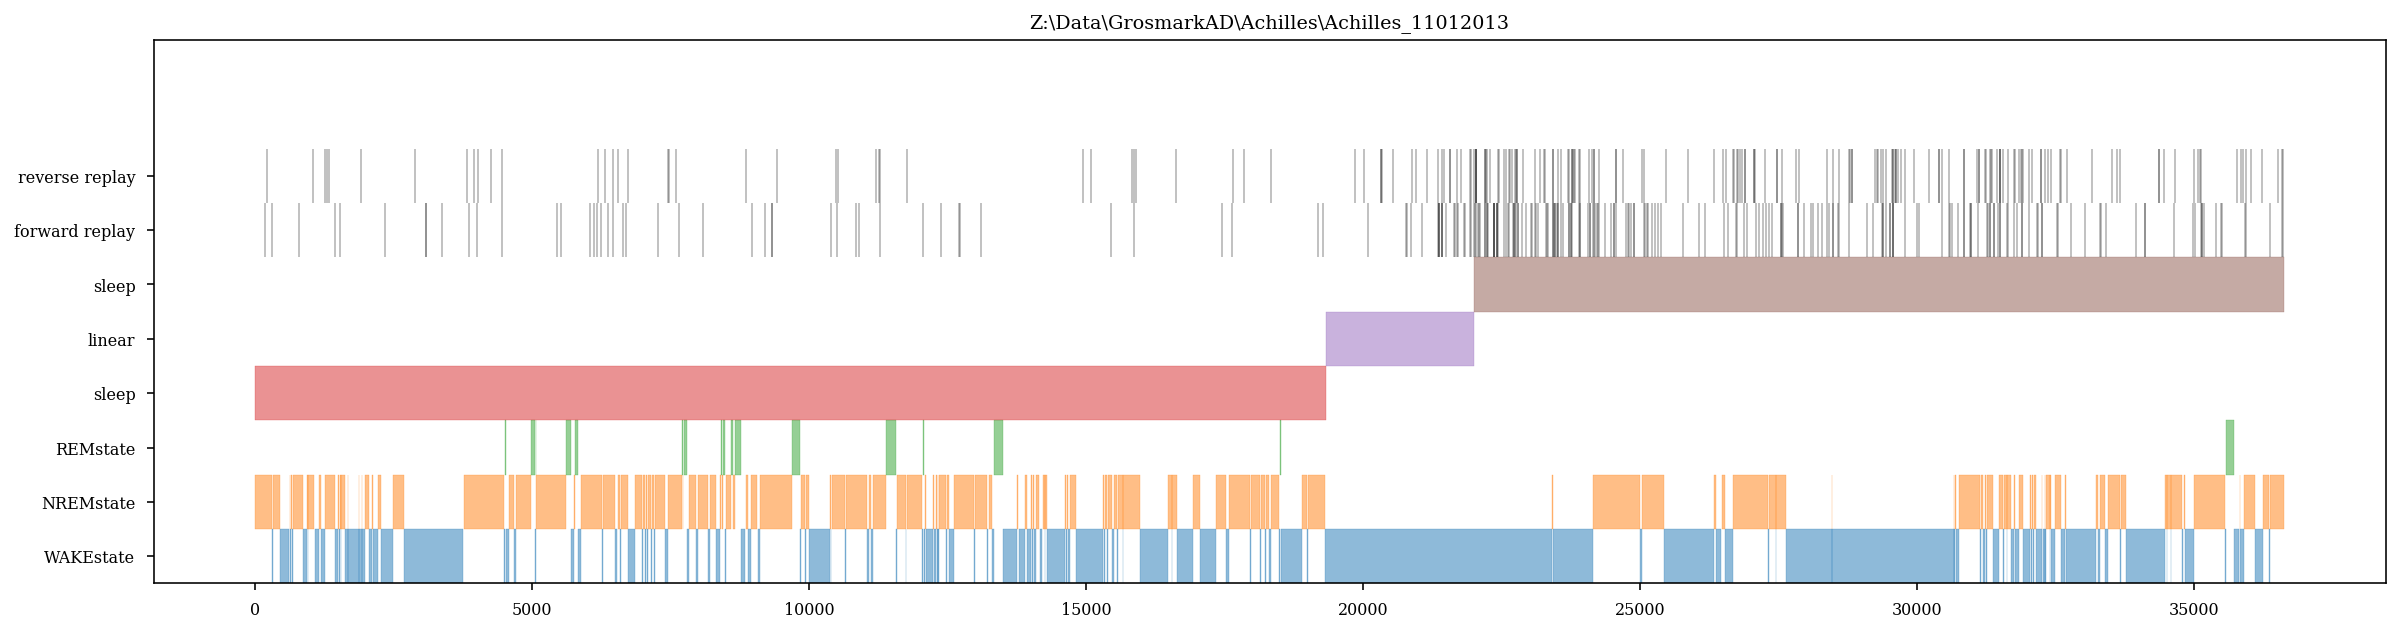

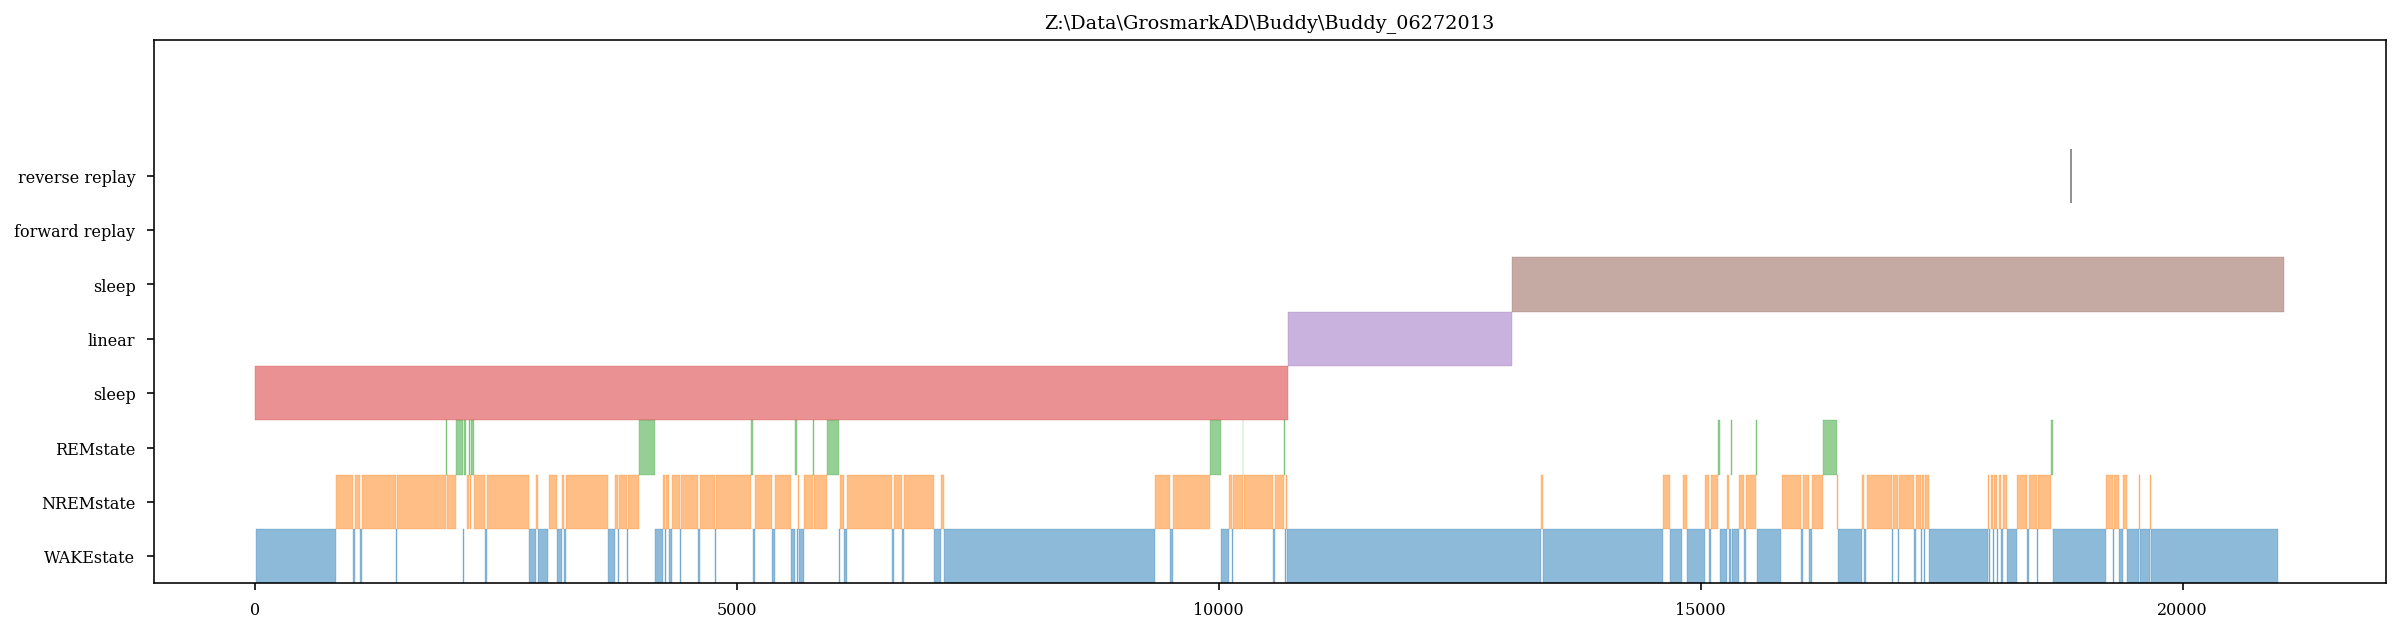

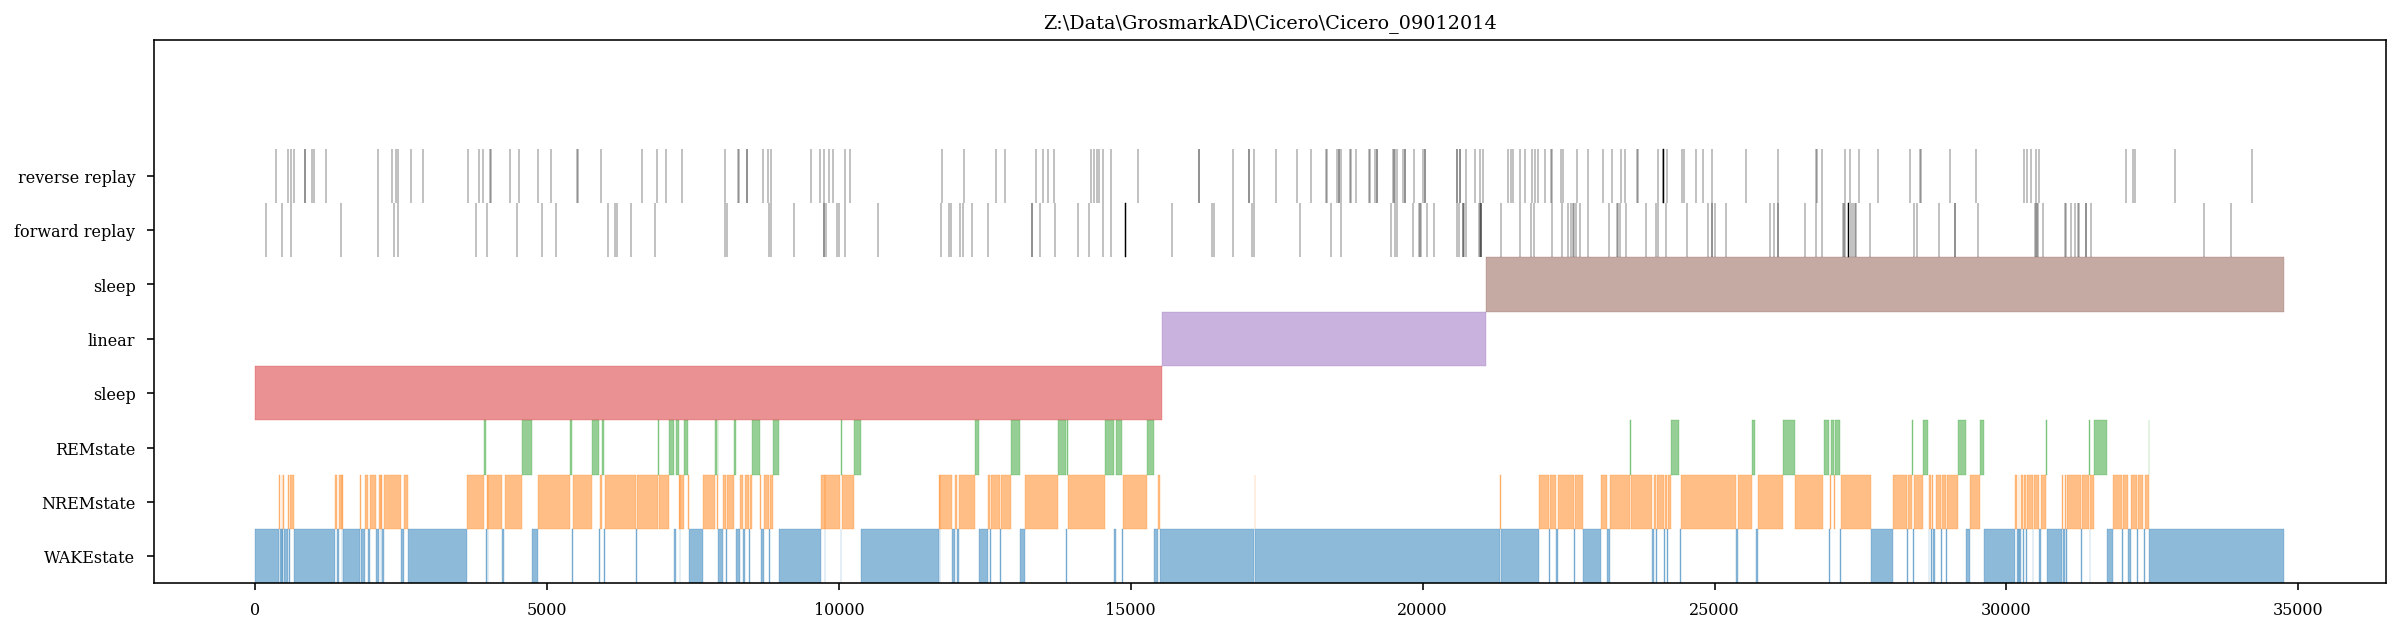

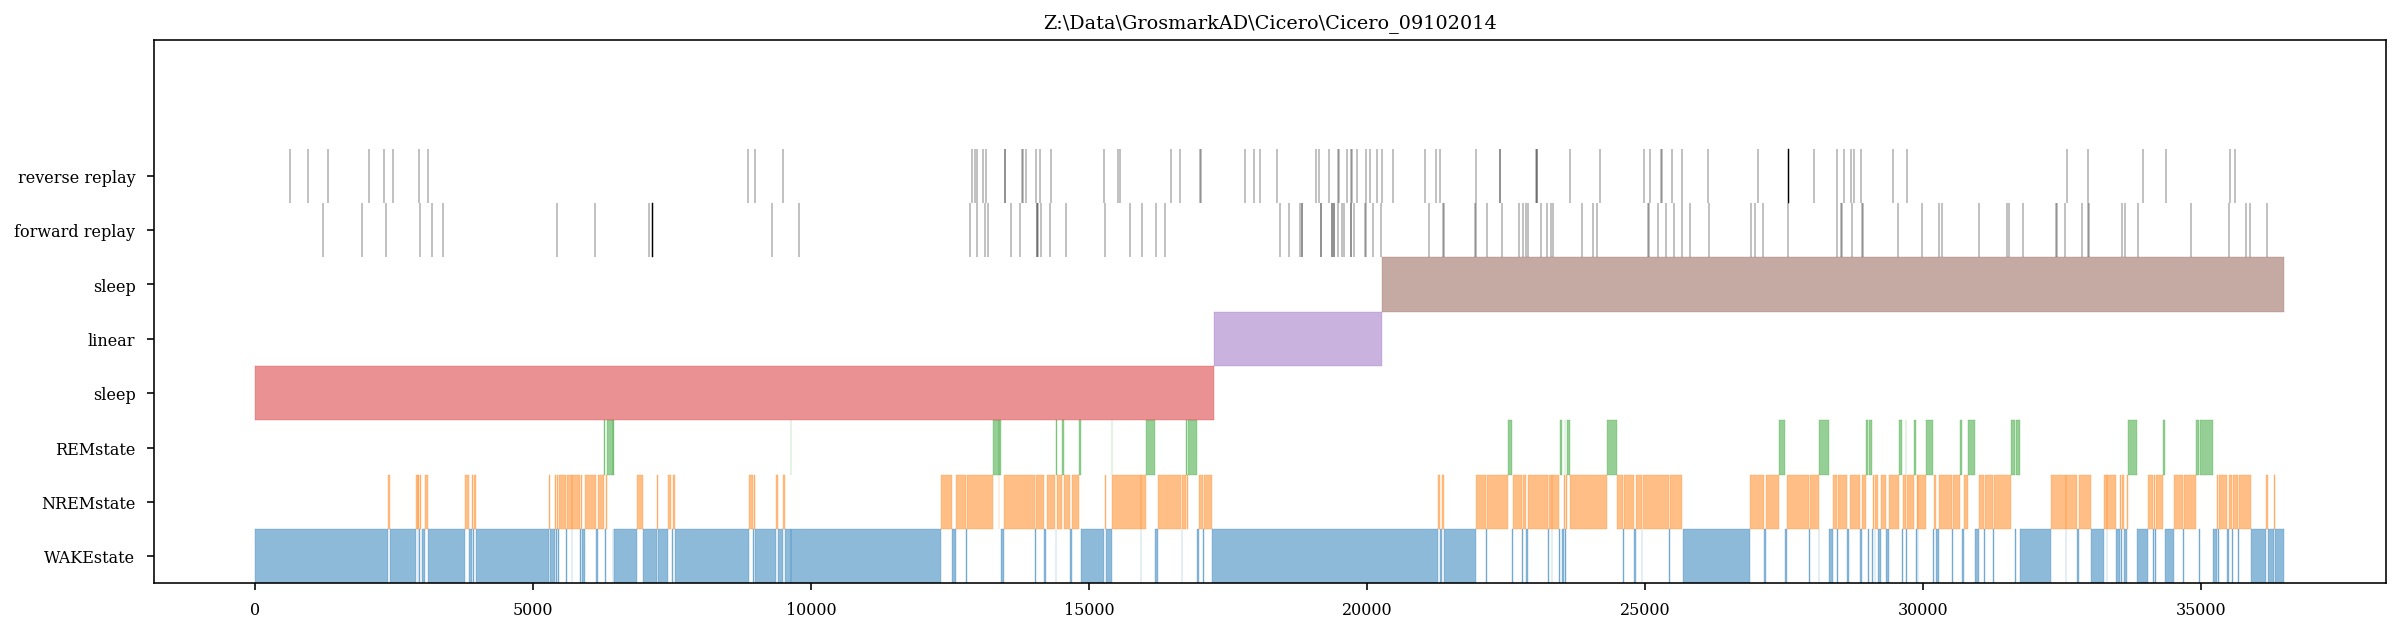

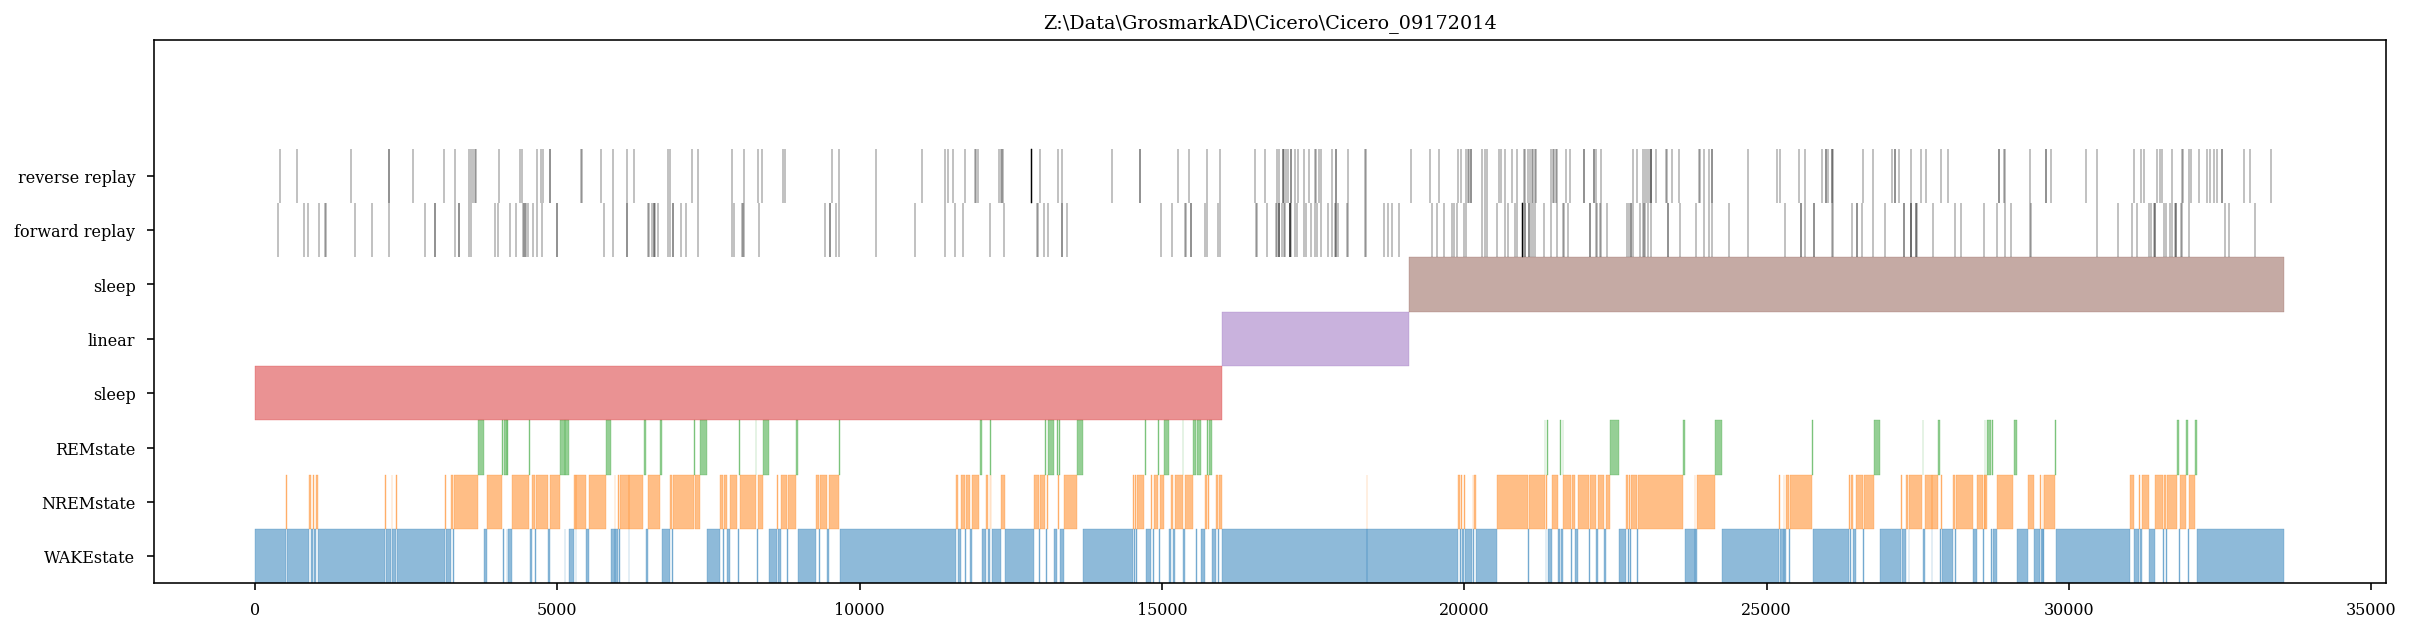

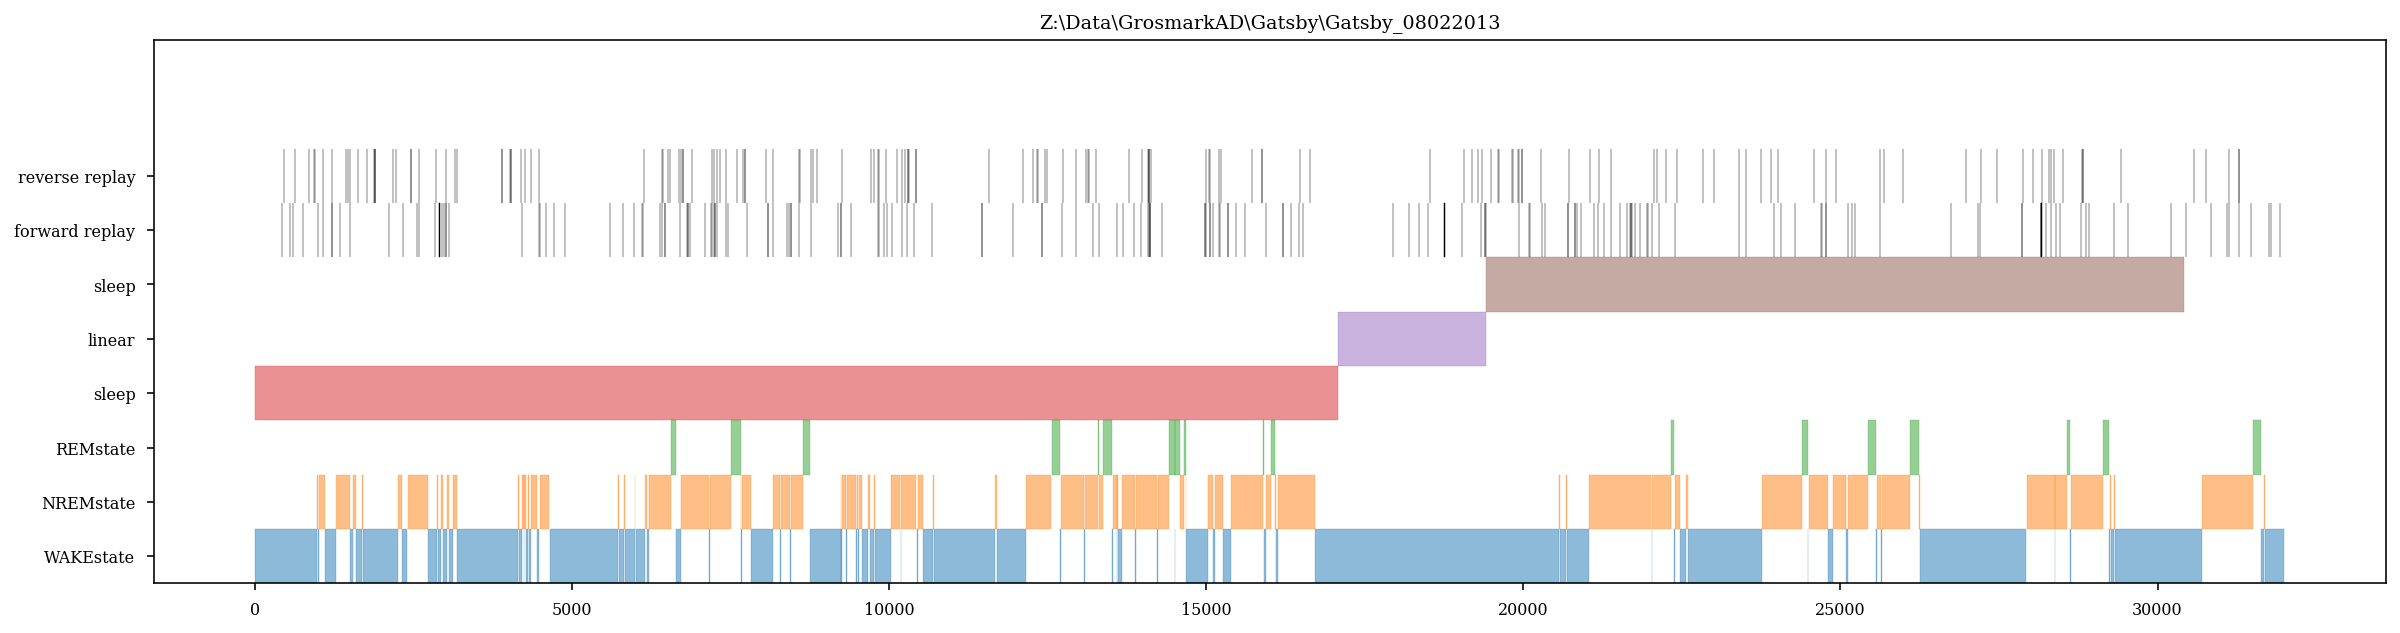

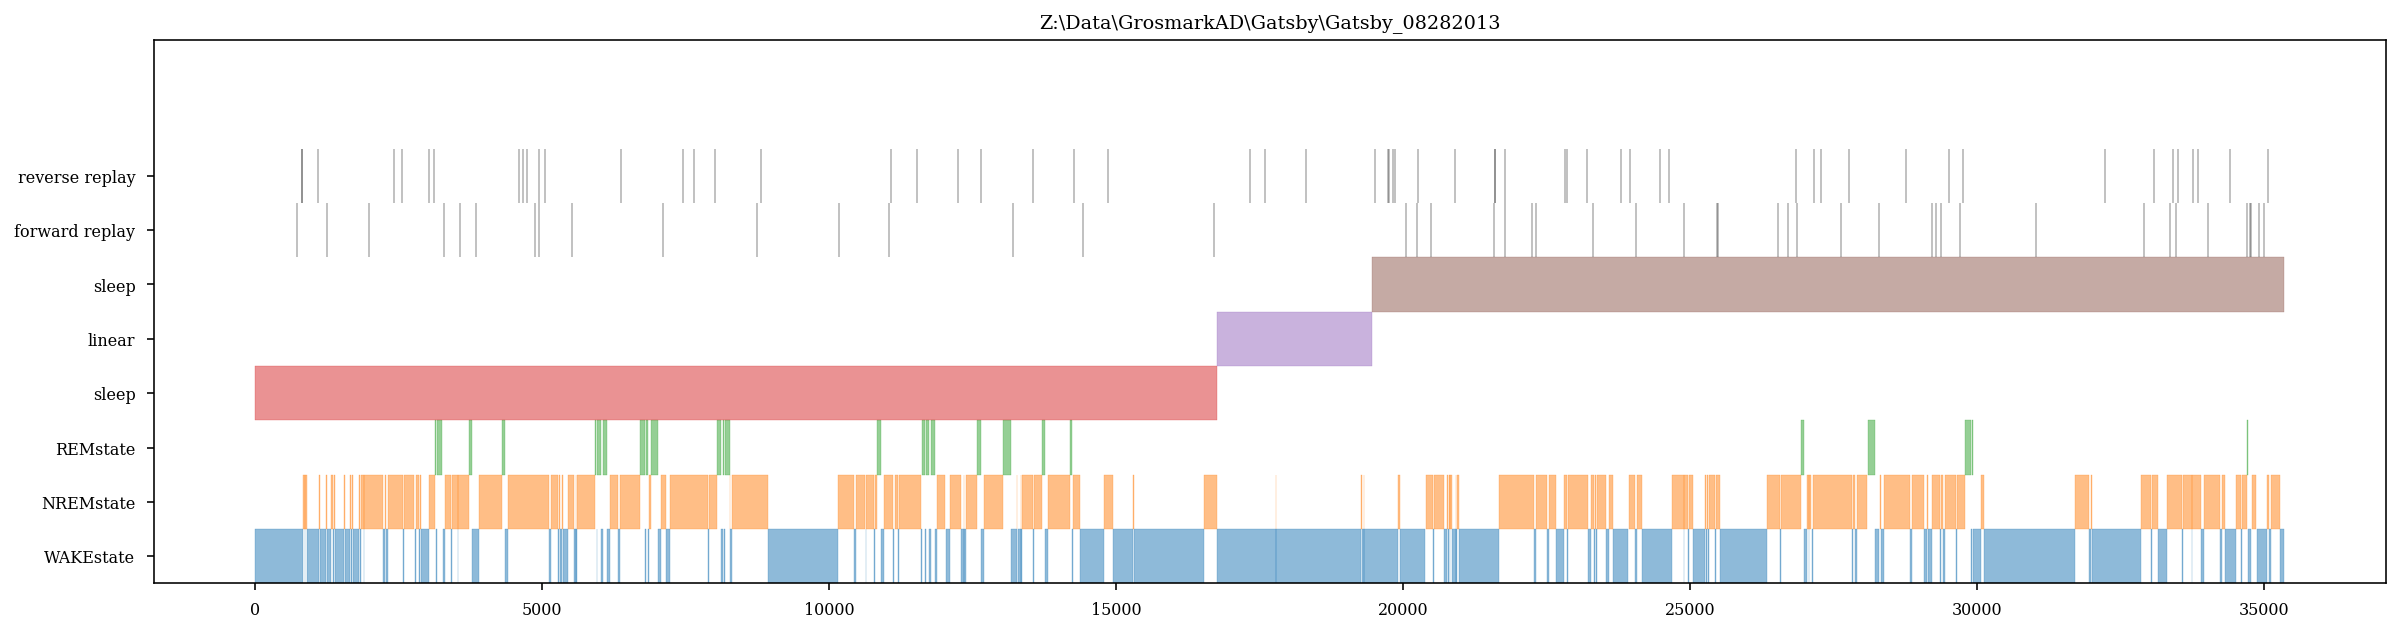

In [83]:
import matplotlib

def plot_sig_replay_over_epochs(df,basepath):

    plt.figure(figsize=(20,5))

    states_dict = loading.load_SleepState_states(basepath)
    epoch_df = loading.load_epoch(basepath)

    cmap = matplotlib.cm.get_cmap('tab20')

    var_keys = ['WAKEstate','NREMstate','REMstate']

    y = np.arange(len(var_keys + list(epoch_df.environment))+3)*.1

    for i,key in enumerate(var_keys):
        for pair in states_dict[key]:
            plt.axvspan(pair[0], pair[1],y[i],y[i+1], alpha=0.5,color=cmap(i*.1))

    for ep in epoch_df.itertuples():
        i+=1
        plt.axvspan(ep.startTime, ep.stopTime,y[i],y[i+1], alpha=0.5,color=cmap(i*.1))


    temp_df = df[(df['score_pval_col_cycle'] < 0.05) & (df.basepath == basepath) & (df.replay_type == 'forward')]
    i+=1
    for ep in temp_df.itertuples():
        plt.axvspan(ep.start, ep.stop,y[i],y[i+1], alpha=1,color='k')

    temp_df = df[(df['score_pval_col_cycle'] < 0.05) & (df.basepath == basepath) & (df.replay_type == 'reverse')]
    i+=1
    for ep in temp_df.itertuples():
        plt.axvspan(ep.start, ep.stop,y[i],y[i+1], alpha=1,color='k')

    # plt.grid() (results['df']['score_pval_time_swap'] < 0.05)
    # plt.plot(results['df'].peaks,(results['df']['score_pval_col_cycle'] < 0.01) ,'k',alpha=.5,label='sig. replay = 1')
    # plt.xlim(results['df'].peaks.min(),results['df'].peaks.max())
    # plt.legend()
    ax = plt.gca()
    ax.set_yticks(y[:-1]+.05)
    ax.set_yticklabels(var_keys + list(epoch_df.environment) + list(['forward replay']) + list(['reverse replay']))
    plt.title(basepath)  

for basepath in df.basepath.unique():
    plot_sig_replay_over_epochs(df,basepath)  
    

In [19]:
save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\replay_test'

sessions = glob.glob(save_path +os.sep+ '*.pkl')
print(sessions)
with open(sessions[1], 'rb') as f:
    results = pickle.load(f)
results.keys()

['Z:\\home\\ryanh\\projects\\ripple_heterogeneity\\replay_test\\Z__Data_GrosmarkAD_Buddy_Buddy_06272013.pkl', 'Z:\\home\\ryanh\\projects\\ripple_heterogeneity\\replay_test\\Z__Data_GrosmarkAD_Cicero_Cicero_09102014.pkl', 'Z:\\home\\ryanh\\projects\\ripple_heterogeneity\\replay_test\\Z__Data_GrosmarkAD_Gatsby_Gatsby_08022013.pkl', 'Z:\\home\\ryanh\\projects\\ripple_heterogeneity\\replay_test\\Z__Data_GrosmarkAD_Gatsby_Gatsby_08282013.pkl']


dict_keys(['outbound_epochs', 'inbound_epochs'])

In [33]:
# import nelpy as nel
basepath = results['outbound_epochs']['session']
epoch_df = loading.load_epoch(basepath)
# behavioral_epochs = nel.EpochArray([np.array([epoch_df.startTime,epoch_df.stopTime]).T])

results['outbound_epochs']['df'].loc[results['outbound_epochs']['df'].start.between(epoch_df.startTime[0],epoch_df.stopTime[0]),'epoch'] = 'pre_sleep'
results['outbound_epochs']['df'].loc[results['outbound_epochs']['df'].start.between(epoch_df.startTime[1],epoch_df.stopTime[1]),'epoch'] = 'linear'
results['outbound_epochs']['df'].loc[results['outbound_epochs']['df'].start.between(epoch_df.startTime[2],epoch_df.stopTime[2]),'epoch'] = 'post_sleep'

results['inbound_epochs']['df'].loc[results['inbound_epochs']['df'].start.between(epoch_df.startTime[0],epoch_df.stopTime[0]),'epoch'] = 'pre_sleep'
results['inbound_epochs']['df'].loc[results['inbound_epochs']['df'].start.between(epoch_df.startTime[1],epoch_df.stopTime[1]),'epoch'] = 'linear'
results['inbound_epochs']['df'].loc[results['inbound_epochs']['df'].start.between(epoch_df.startTime[2],epoch_df.stopTime[2]),'epoch'] = 'post_sleep'

In [34]:
results['outbound_epochs']['df'].keys()

Index(['start', 'stop', 'peaks', 'amplitude', 'duration', 'frequency',
       'detectorName', 'ripple_channel', 'event_spk_thres', 'basepath',
       'basename', 'animal', 'n_active', 'inactive_bin_prop',
       'trajectory_score', 'r_squared', 'slope', 'intercept',
       'score_pval_time_swap', 'score_pval_col_cycle', 'traj_dist',
       'traj_speed', 'traj_step', 'replay_type', 'epoch'],
      dtype='object')

In [35]:
display(results['outbound_epochs']['df'][results['outbound_epochs']['df'].score_pval_col_cycle < 0.05])
display(results['inbound_epochs']['df'][results['inbound_epochs']['df'].score_pval_col_cycle < 0.05])



,start,stop,peaks,amplitude,duration,frequency,detectorName,ripple_channel,event_spk_thres,basepath,...,r_squared,slope,intercept,score_pval_time_swap,score_pval_col_cycle,traj_dist,traj_speed,traj_step,replay_type,epoch
4054,13820.9720,13821.0584,13820.9728,677.972912,0.0864,139.482434,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Cicero\Cicero_09102014,...,0.020408,0.863617,-6.477129,0.259827,0.033977,2.590852,43.180859,1.295426,reverse,pre_sleep
4195,14121.2480,14121.3576,14121.2976,759.079707,0.1096,143.607902,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Cicero\Cicero_09102014,...,0.892857,4.318086,-93.270655,0.703531,0.049300,12.954258,215.904295,6.477129,reverse,pre_sleep
4541,15293.7880,15293.8768,15293.8552,758.408734,0.0888,140.934474,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Cicero\Cicero_09102014,...,0.979592,-12.090641,736.521518,0.563624,0.007995,24.181281,604.532026,12.090641,forward,pre_sleep
6886,21957.3768,21957.4872,21957.4800,754.729369,0.1104,161.697379,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Cicero\Cicero_09102014,...,0.480769,1.162562,-128.579312,0.487009,0.043971,4.650246,58.128079,2.325123,reverse,post_sleep
7734,23231.9320,23232.0296,23231.9528,630.257314,0.0976,161.020578,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Cicero\Cicero_09102014,...,0.450667,-3.929458,573.700892,0.664224,0.001332,11.788374,196.472908,3.929458,forward,post_sleep


,start,stop,peaks,amplitude,duration,frequency,detectorName,ripple_channel,event_spk_thres,basepath,...,r_squared,slope,intercept,score_pval_time_swap,score_pval_col_cycle,traj_dist,traj_speed,traj_step,replay_type,epoch
76,623.1344,623.2376,623.2312,265.626283,0.1032,149.551190,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Cicero\Cicero_09102014,...,0.001776,0.604577,99.755281,0.310460,0.012658,2.418310,30.228873,0.604577,reverse,pre_sleep
189,950.5560,950.6376,950.6008,527.252950,0.0816,164.045091,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Cicero\Cicero_09102014,...,0.007692,0.604577,72.851584,0.811459,0.018654,1.813732,30.228873,0.604577,reverse,pre_sleep
293,1225.9696,1226.0608,1225.9920,190.517361,0.0912,185.744970,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Cicero\Cicero_09102014,...,0.487805,-6.045775,518.425172,0.090606,0.009327,18.137324,302.288730,6.045775,forward,pre_sleep
338,1312.4880,1312.5960,1312.5704,190.617690,0.1080,141.229009,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Cicero\Cicero_09102014,...,0.807563,18.741901,-1327.652102,0.588274,0.013324,74.967605,937.095063,18.741901,reverse,pre_sleep
526,1928.1464,1928.2344,1928.2096,190.328716,0.0880,142.422635,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Cicero\Cicero_09102014,...,0.454545,-3.022887,565.279925,0.324450,0.007995,9.068662,151.144365,3.022887,forward,pre_sleep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12169,35518.6088,35518.6984,35518.6520,398.187390,0.0896,165.843078,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Cicero\Cicero_09102014,...,0.838017,11.789260,-106104.855626,0.081279,0.011992,35.367781,589.463023,11.789260,reverse,post_sleep
12224,35621.2520,35621.3760,35621.3288,336.280589,0.1240,155.689085,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Cicero\Cicero_09102014,...,0.024051,2.850151,-25584.048310,0.247835,0.047968,14.250754,142.507544,2.850151,reverse,post_sleep
12301,35811.2024,35811.2952,35811.2408,412.479802,0.0928,141.437324,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Cicero\Cicero_09102014,...,0.701565,-32.949472,301273.342020,0.169221,0.043304,98.848415,1647.473578,32.949472,forward,post_sleep
12341,35881.5584,35881.6400,35881.6152,532.545755,0.0816,149.494876,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Cicero\Cicero_09102014,...,0.750000,-10.580106,97337.474831,0.266489,0.025983,21.160211,529.005277,10.580106,forward,post_sleep


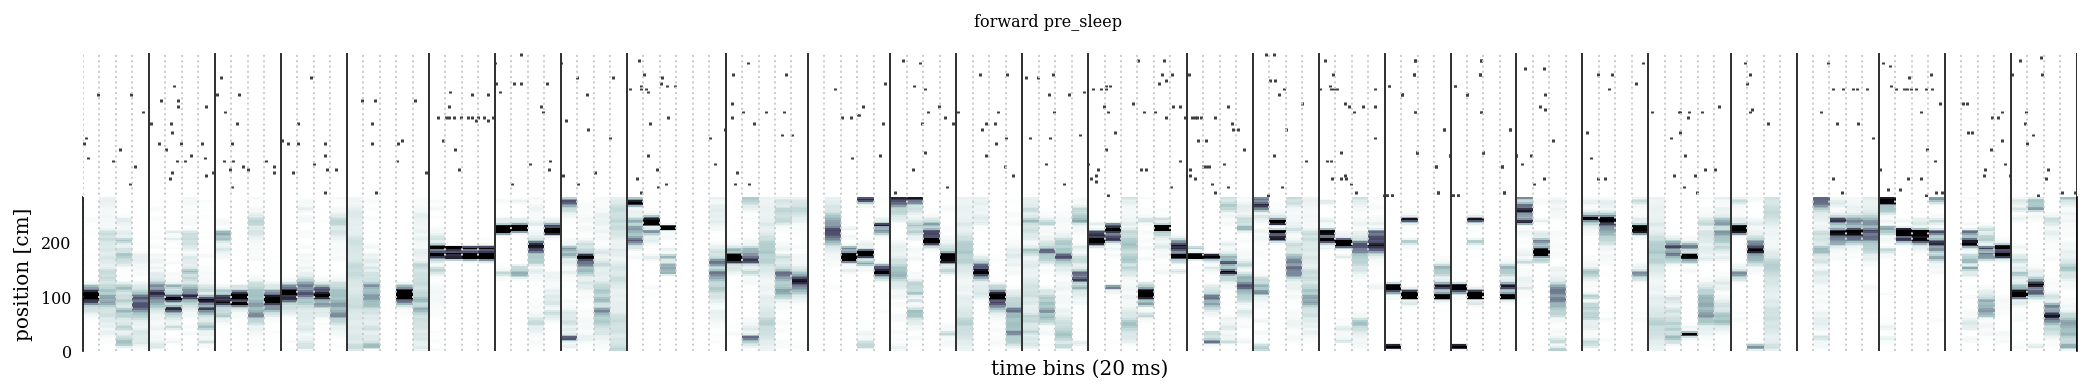

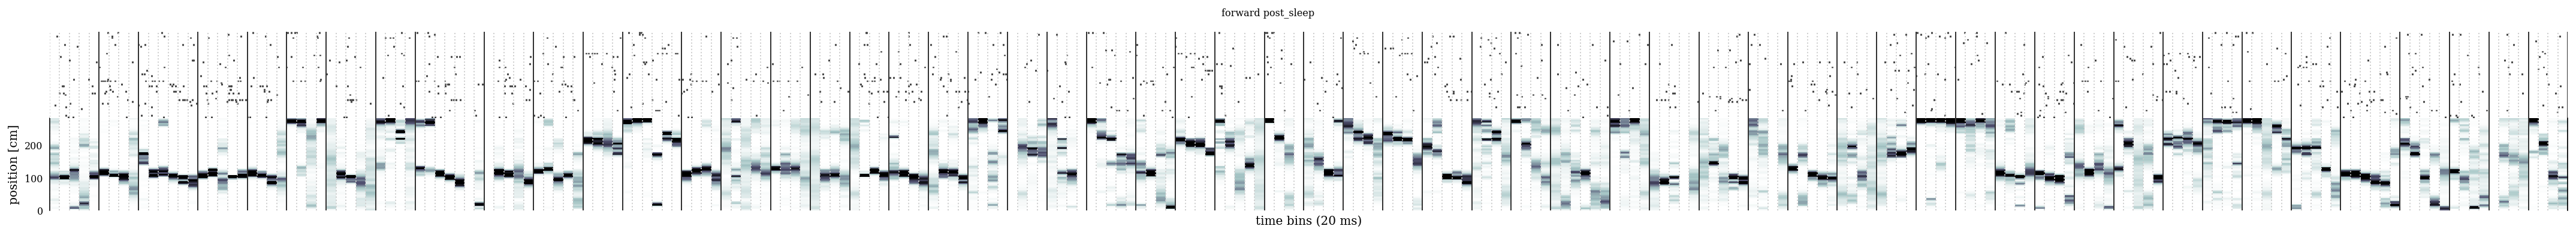

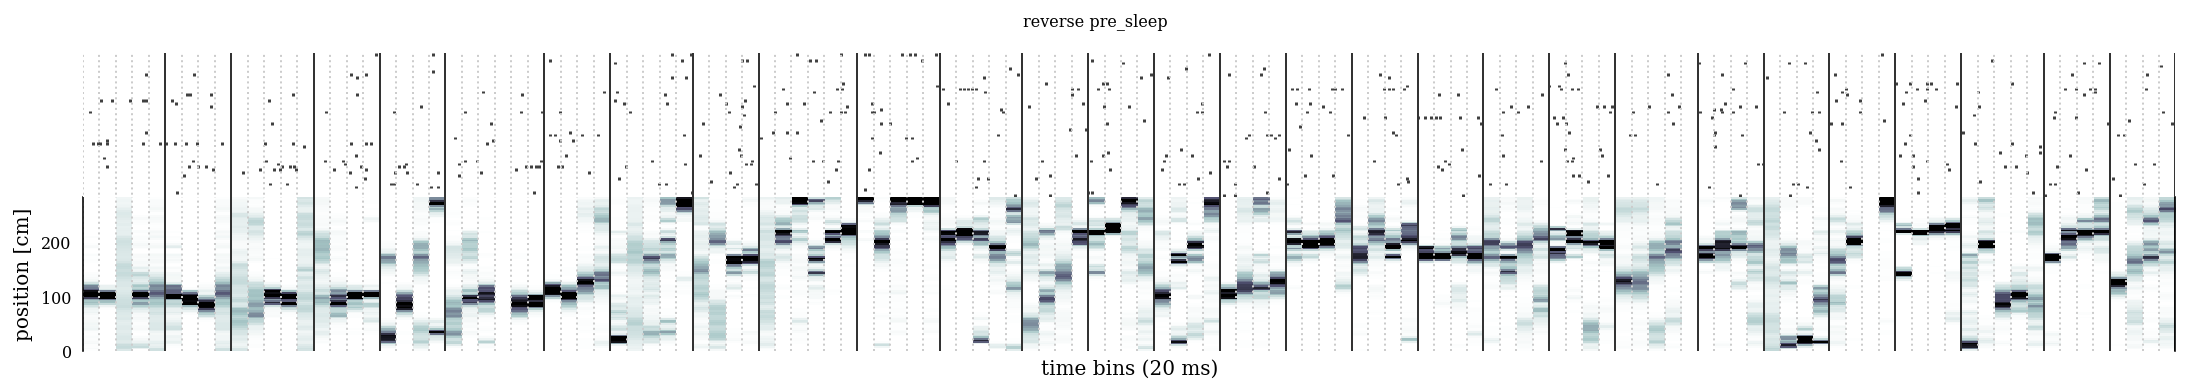

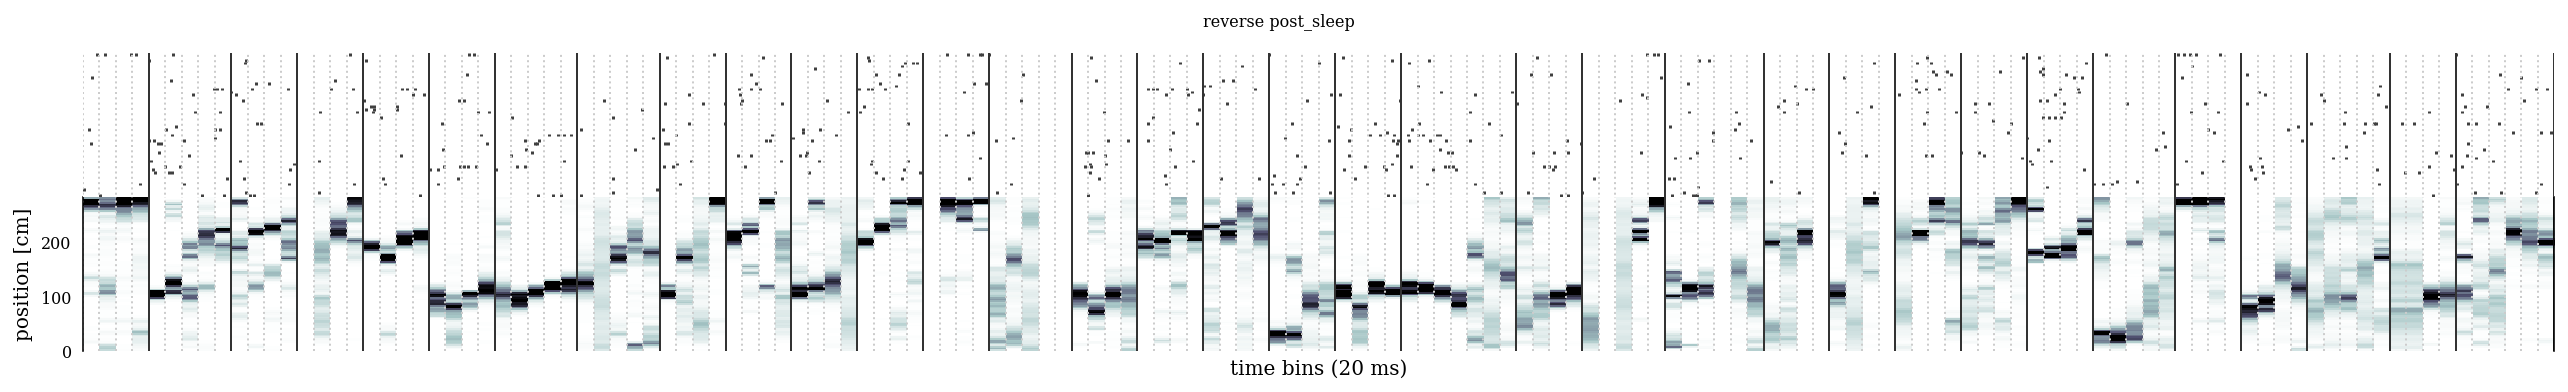

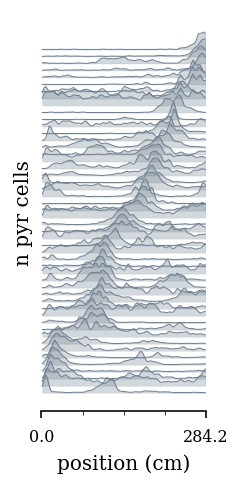

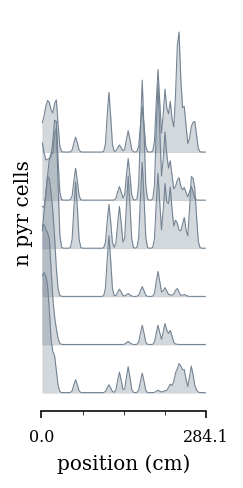

In [41]:
import importlib
import replay_fig
from matplotlib.ticker import AutoMinorLocator
import nelpy.plotting as npl
import warnings
warnings.filterwarnings("ignore")

importlib.reload(replay_fig)
idx = np.where(
                (results['inbound_epochs']['df'].score_pval_col_cycle < 0.05) &
                (results['inbound_epochs']['df'].replay_type == 'forward') &
                (results['inbound_epochs']['df'].epoch == 'pre_sleep') 
            )[0]

ax,fig = replay_fig.plot_all_replay(results['inbound_epochs']['bst_placecells'][idx],
                                        results['inbound_epochs']['sta_placecells'],
                                        results['inbound_epochs']['tc'],
                                        results['inbound_epochs']['tc'],
                                        vmax=.1,
                                        title_str="forward pre_sleep")

idx = np.where(
                (results['inbound_epochs']['df'].score_pval_col_cycle < 0.05) &
                (results['inbound_epochs']['df'].replay_type == 'forward') &
                (results['inbound_epochs']['df'].epoch == 'post_sleep') 
            )[0]

ax,fig = replay_fig.plot_all_replay(results['inbound_epochs']['bst_placecells'][idx],
                                        results['inbound_epochs']['sta_placecells'],
                                        results['inbound_epochs']['tc'],
                                        results['inbound_epochs']['tc'],
                                        vmax=.1,
                                        title_str="forward post_sleep")



idx = np.where(
                (results['inbound_epochs']['df'].score_pval_col_cycle < 0.05) &
                (results['inbound_epochs']['df'].replay_type == 'reverse') &
                (results['inbound_epochs']['df'].epoch == 'pre_sleep') 
            )[0]

ax,fig = replay_fig.plot_all_replay(results['inbound_epochs']['bst_placecells'][idx],
                                        results['inbound_epochs']['sta_placecells'],
                                        results['inbound_epochs']['tc'],
                                        results['inbound_epochs']['tc'],
                                        vmax=.1,
                                        title_str="reverse pre_sleep")

idx = np.where(
                (results['inbound_epochs']['df'].score_pval_col_cycle < 0.05) &
                (results['inbound_epochs']['df'].replay_type == 'reverse') &
                (results['inbound_epochs']['df'].epoch == 'post_sleep') 
            )[0]

ax,fig = replay_fig.plot_all_replay(results['inbound_epochs']['bst_placecells'][idx],
                                        results['inbound_epochs']['sta_placecells'],
                                        results['inbound_epochs']['tc'],
                                        results['inbound_epochs']['tc'],
                                        vmax=.1,
                                        title_str="reverse post_sleep")


tc = results['inbound_epochs']['tc'].reorder_units()

w,h = functions.set_size('thesis', fraction=.25, subplots=(4,1))

npl.set_palette(npl.colors.rainbow)
with npl.FigureManager(show=True, figsize=(w,h)) as (fig, ax):
    npl.utils.skip_if_no_output(fig)
    ax1 = npl.plot_tuning_curves1D(tc, normalize=True, pad=.4,fill=True,color='slategrey')
    leg_lines = ax1.get_lines()
    plt.setp(leg_lines, linewidth=.5)
    ax.set_xlabel('position (cm)')
    ax.set_ylabel('n pyr cells')
    # ax.set_yticks([0,tc.ratemap.shape[0]])
    ax.set_yticks([])
    ax.set_xticks([0,tc.bins.max()])

    ax.xaxis.set_minor_locator(AutoMinorLocator())

tc = results['outbound_epochs']['tc'].reorder_units()
w,h = functions.set_size('thesis', fraction=.25, subplots=(4,1))
npl.set_palette(npl.colors.rainbow)
with npl.FigureManager(show=True, figsize=(w,h)) as (fig, ax):
    npl.utils.skip_if_no_output(fig)
    ax1 = npl.plot_tuning_curves1D(tc, normalize=True, pad=.4,fill=True,color='slategrey')
    leg_lines = ax1.get_lines()
    plt.setp(leg_lines, linewidth=.5)
    ax.set_xlabel('position (cm)')
    ax.set_ylabel('n pyr cells')
    # ax.set_yticks([0,tc.ratemap.shape[0]])
    ax.set_yticks([])
    ax.set_xticks([0,tc.bins.max()])

    ax.xaxis.set_minor_locator(AutoMinorLocator())

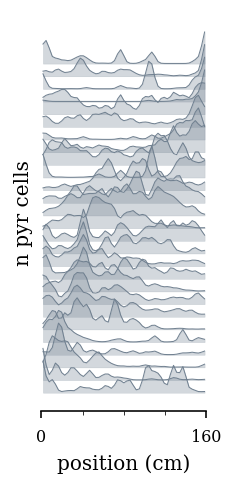

In [17]:
save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\replay'

# sessions = glob.glob(save_path +os.sep+ '*.pkl')
session = 'Z:\\home\\ryanh\\projects\\ripple_heterogeneity\\replay\\Z__Data_GrosmarkAD_Buddy_Buddy_06272013.pkl'

with open(session, 'rb') as f:
    results = pickle.load(f)

tc = results['tc'].reorder_units()
w,h = functions.set_size('thesis', fraction=.25, subplots=(4,1))
npl.set_palette(npl.colors.rainbow)
with npl.FigureManager(show=True, figsize=(w,h)) as (fig, ax):
    npl.utils.skip_if_no_output(fig)
    ax1 = npl.plot_tuning_curves1D(tc, normalize=True, pad=.4,fill=True,color='slategrey')
    leg_lines = ax1.get_lines()
    plt.setp(leg_lines, linewidth=.5)
    ax.set_xlabel('position (cm)')
    ax.set_ylabel('n pyr cells')
    # ax.set_yticks([0,tc.ratemap.shape[0]])
    ax.set_yticks([])
    ax.set_xticks([0,tc.bins.max()])

    ax.xaxis.set_minor_locator(AutoMinorLocator())    

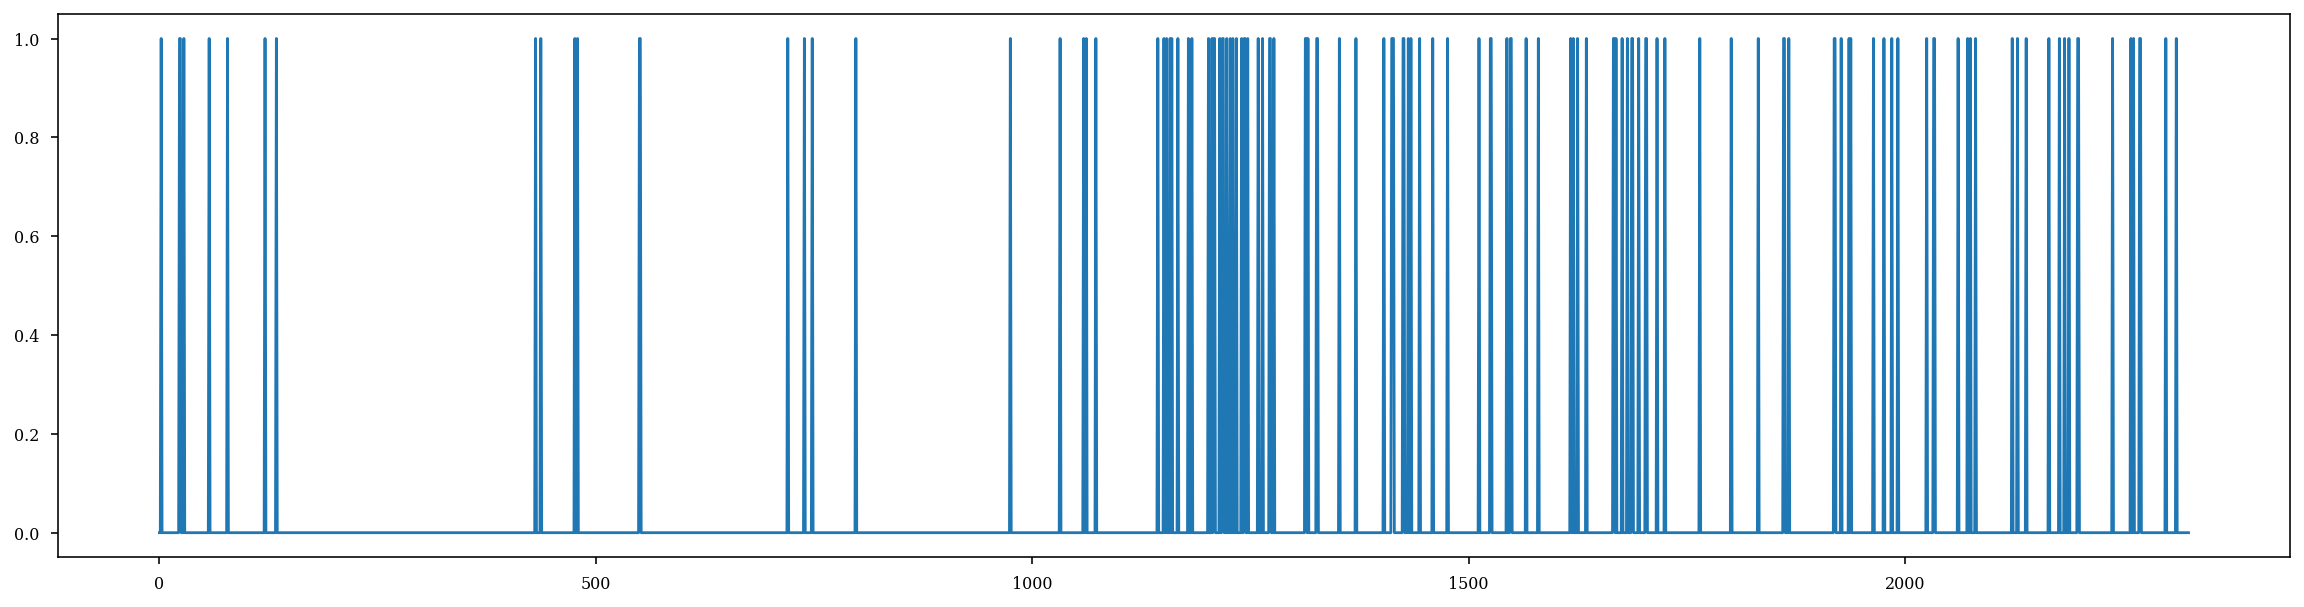

In [49]:
plt.figure(figsize=(20,5))

plt.plot((results['df']['score_pval_col_cycle'] < 0.05) & (results['df']['score_pval_time_swap'] < 0.05))

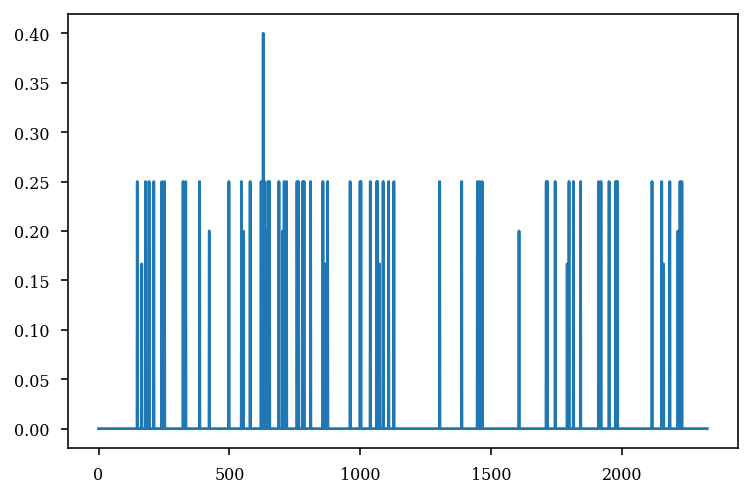

In [46]:
plt.plot(results['df'].inactive_bin_prop)


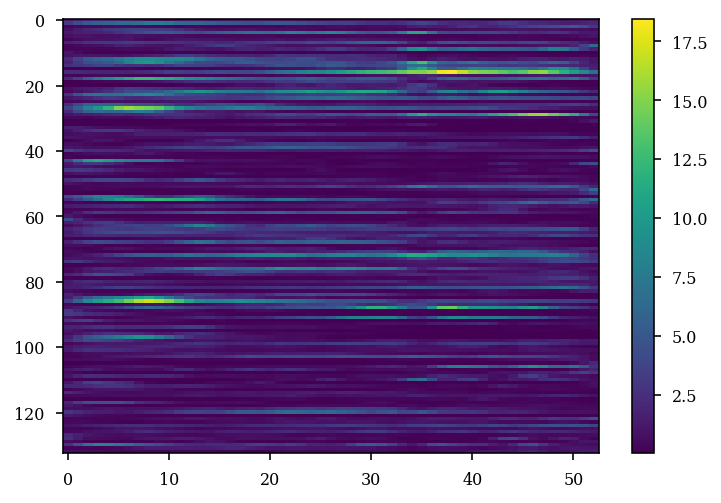

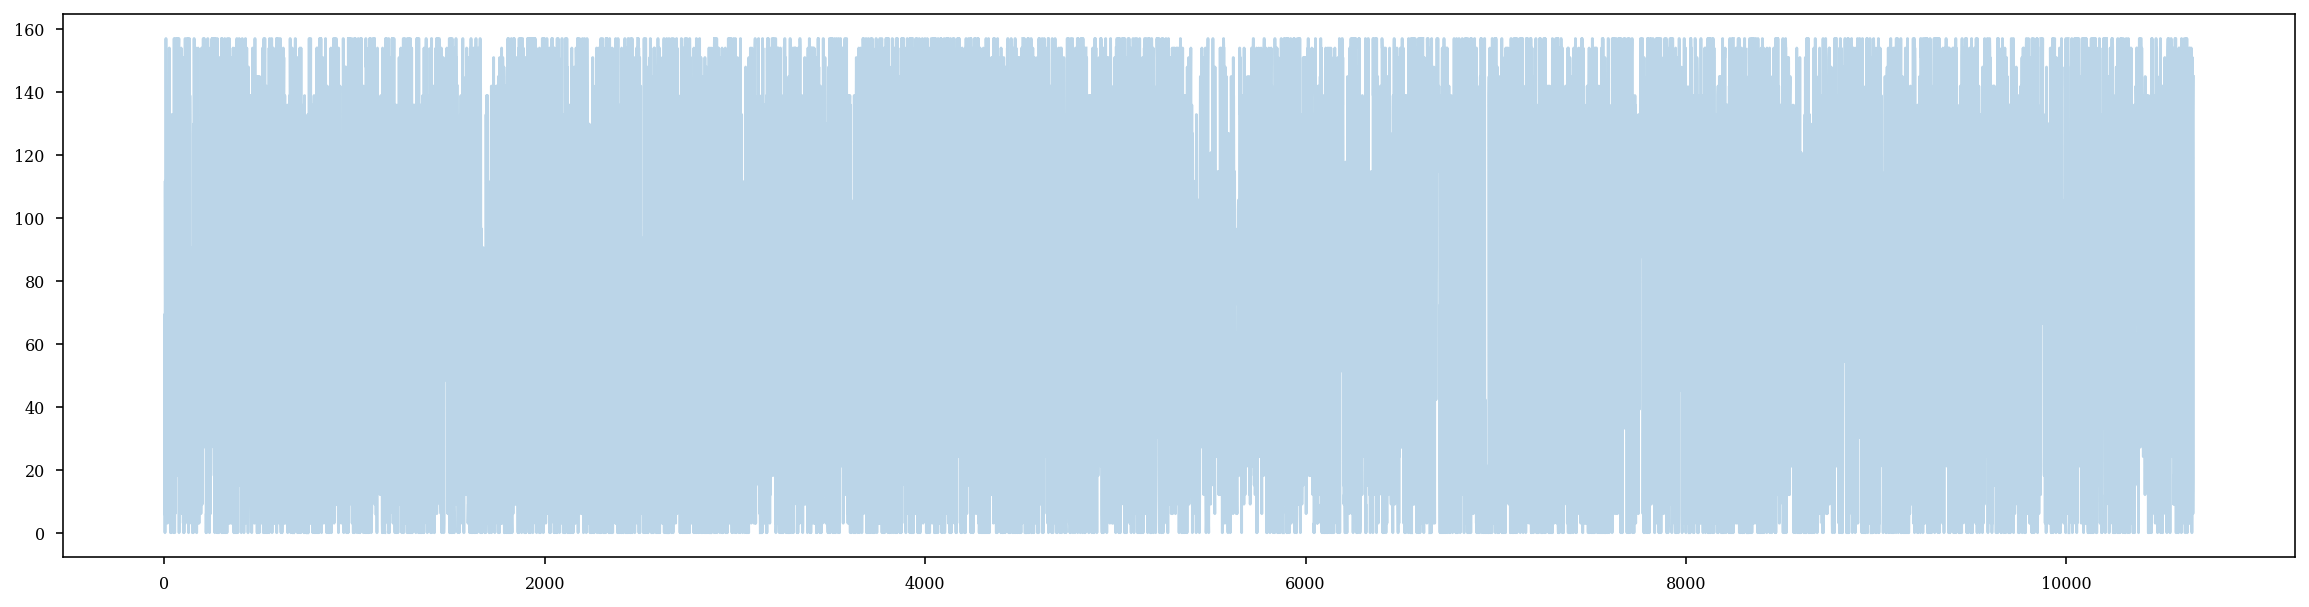

In [38]:
tc = results['tc']

# plt.imshow(tc.ratemap)
plt.imshow(tc.ratemap,aspect='auto',interpolation='nearest')
plt.colorbar()

plt.figure(figsize=(20,5))
mode_pth = results['mode_pth']
plt.plot(mode_pth,alpha=.3)

In [14]:
# plt.plot(results['tc'])
plt.imshow(tc.ratemap[np.array(tc.get_peak_firing_order_ids())-1,:],aspect='auto',interpolation='nearest',vmax=5)
plt.colorbar()
plt.show()

IndexError: index 199 is out of bounds for axis 0 with size 133